# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

from sklearn.metrics import r2_score

## Data Acquisition 

In [2]:
path = "MagicBricks_New.csv"
dataset = pd.read_csv(path)
dataset

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,865.0,4,4.0,Unfurnished,Dwarka,2.0,31833351,Ready_to_move,Resale,Builder_Floor,36801.0
19996,1030.0,2,2.0,Furnished,Dwarka,3.0,2900502,Almost_ready,New_Property,Apartment,2816.0
19997,879.0,1,1.0,Furnished,Rohini Sector 25,2.0,21080582,Almost_ready,Resale,Builder_Floor,23982.0
19998,2211.0,1,1.0,Furnished,Rohini Sector 24,3.0,15013389,Ready_to_move,New_Property,Builder_Floor,6790.0


In [3]:
# # unique_sum = dataset['Locality'].nunique()
# # unique_sum

dataset1 = dataset['Locality']
# dataset1 = dataset['Locality'].unique().tolist()
dataset1

0                              Rohini Sector 25
1        J R Designers Floors, Rohini Sector 24
2           Citizen Apartment, Rohini Sector 13
3                              Rohini Sector 24
4                              Rohini Sector 24
                          ...                  
19995                                    Dwarka
19996                                    Dwarka
19997                          Rohini Sector 25
19998                          Rohini Sector 24
19999                          Rohini Sector 25
Name: Locality, Length: 20000, dtype: object

In [4]:
# dataset = dataset.drop(['Locality'], axis=1)

## Data Understanding

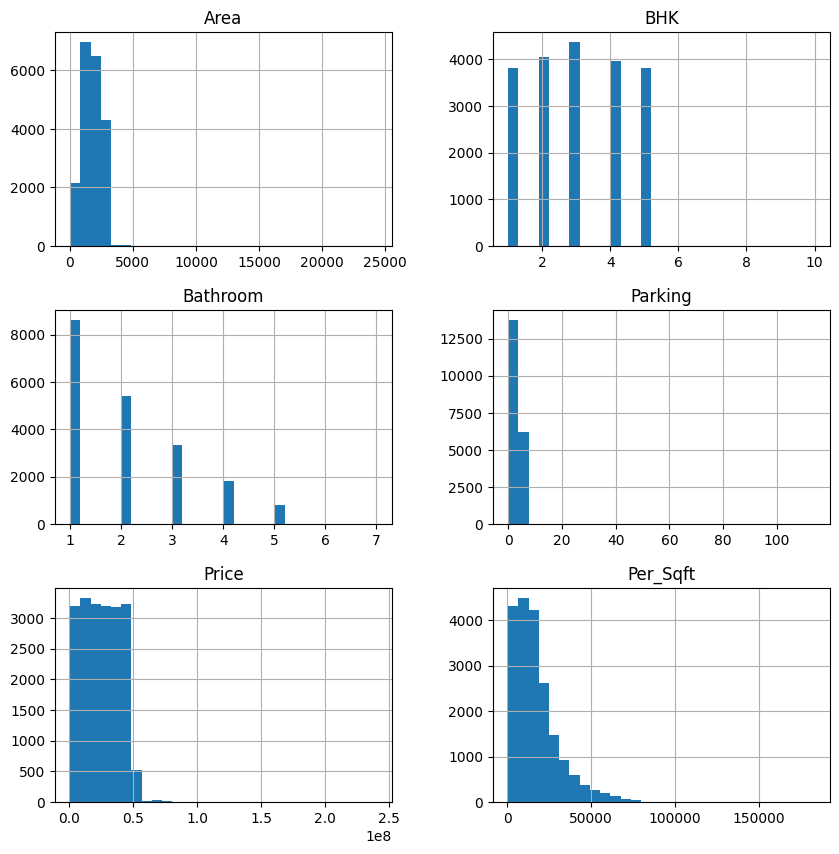

In [5]:
dataset.hist(bins=30,figsize=(10,10))
plt.show()

In [6]:
dataset.shape

(20000, 11)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Area         20000 non-null  float64
 1   BHK          20000 non-null  int64  
 2   Bathroom     19998 non-null  float64
 3   Furnishing   19995 non-null  object 
 4   Locality     20000 non-null  object 
 5   Parking      19967 non-null  float64
 6   Price        20000 non-null  int64  
 7   Status       20000 non-null  object 
 8   Transaction  20000 non-null  object 
 9   Type         19995 non-null  object 
 10  Per_Sqft     19759 non-null  float64
dtypes: float64(4), int64(2), object(5)
memory usage: 1.7+ MB


In [8]:
dataset.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [9]:
dataset.describe()

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
count,20000.000000,20000.000000,19998.000000,19967.000000,2.000000e+04,19759.000000
mean,1779.995749,2.996350,2.044004,2.454500,2.587014e+07,17441.348803
std,781.157695,1.389904,1.156488,2.272972,1.498736e+07,13963.746936
min,28.000000,1.000000,1.000000,0.000000,1.000000e+06,678.000000
25%,1166.000000,2.000000,1.000000,1.000000,1.339080e+07,7642.500000
50%,1754.500000,3.000000,2.000000,2.000000,2.540861e+07,14368.000000
75%,2377.000000,4.000000,3.000000,4.000000,3.796099e+07,22664.500000
max,24300.000000,10.000000,7.000000,114.000000,2.400000e+08,183333.000000


In [10]:
dataset.dtypes

Area           float64
BHK              int64
Bathroom       float64
Furnishing      object
Locality        object
Parking        float64
Price            int64
Status          object
Transaction     object
Type            object
Per_Sqft       float64
dtype: object

In [11]:
numericalCol = dataset.select_dtypes(['float64', 'int64'])
numericalCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Area      20000 non-null  float64
 1   BHK       20000 non-null  int64  
 2   Bathroom  19998 non-null  float64
 3   Parking   19967 non-null  float64
 4   Price     20000 non-null  int64  
 5   Per_Sqft  19759 non-null  float64
dtypes: float64(4), int64(2)
memory usage: 937.6 KB


In [12]:
categoricalCol = dataset.select_dtypes(['object'])
categoricalCol.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Furnishing   19995 non-null  object
 1   Locality     20000 non-null  object
 2   Status       20000 non-null  object
 3   Transaction  20000 non-null  object
 4   Type         19995 non-null  object
dtypes: object(5)
memory usage: 781.4+ KB


## Data Visualization

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\4027665221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')


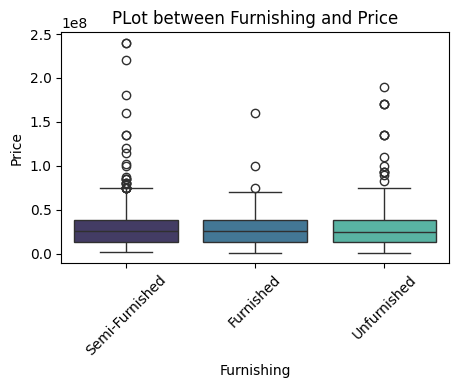

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\4027665221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')


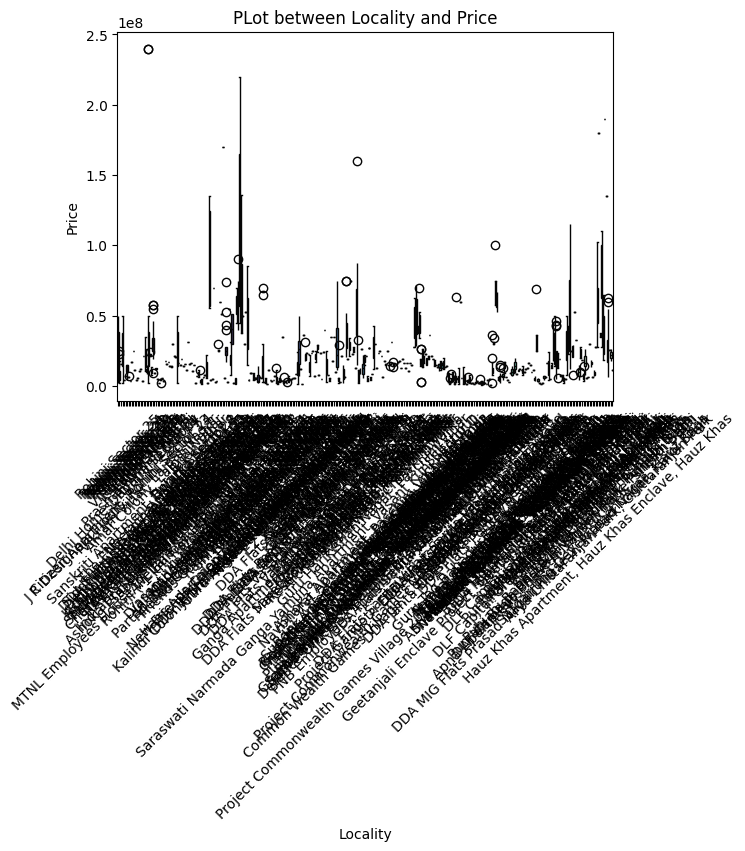

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\4027665221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')


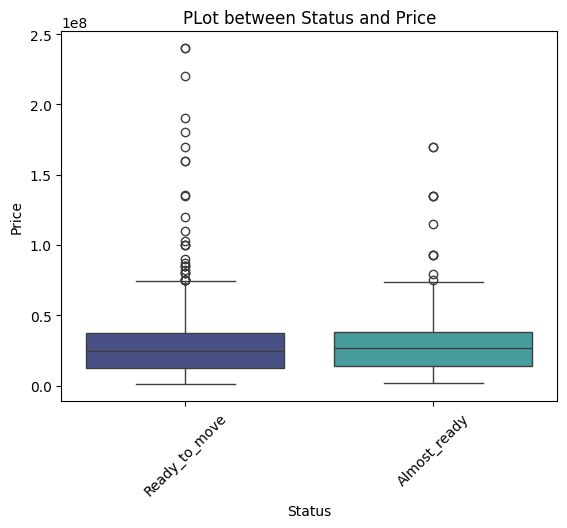

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\4027665221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')


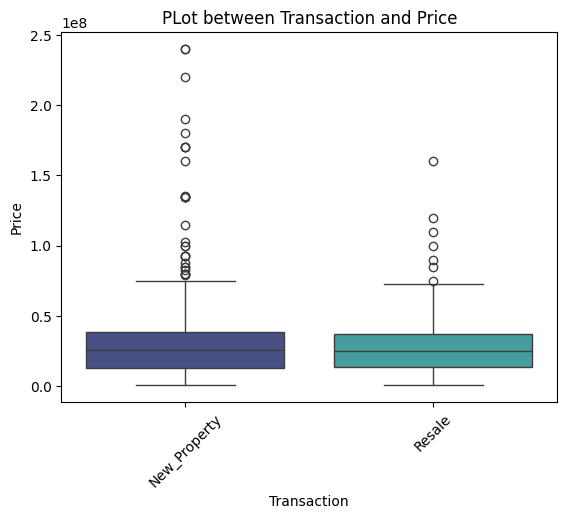

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\4027665221.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')


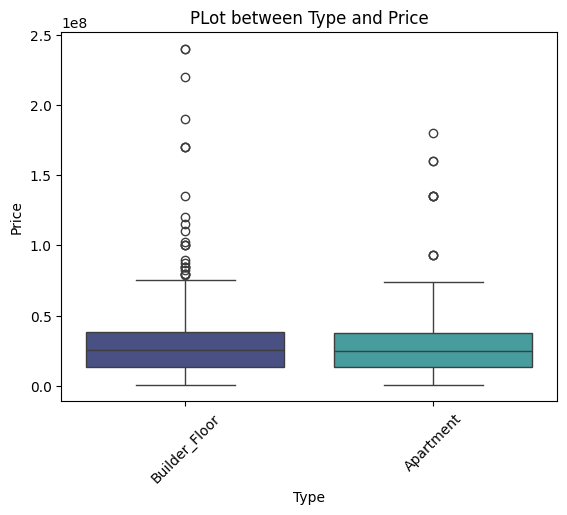

In [13]:
plt.figure(figsize=(5, 3))
for col in categoricalCol.columns:
    sns.boxplot(x=dataset[col], y=dataset['Price'], palette='mako')
    plt.title(f"PLot between {col} and Price")
    plt.xlabel(f"{col}")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.show()

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2746563780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = dataset[col], palette='Blues')


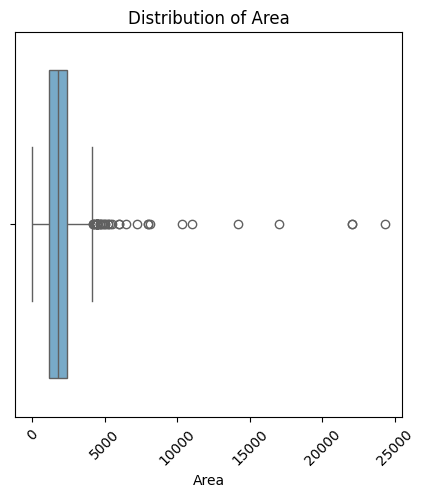

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2746563780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = dataset[col], palette='Blues')


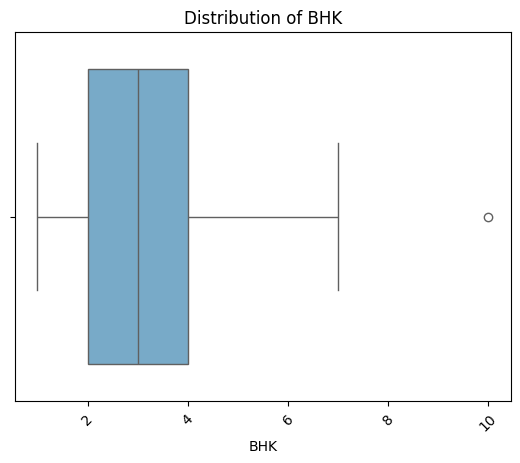

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2746563780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = dataset[col], palette='Blues')


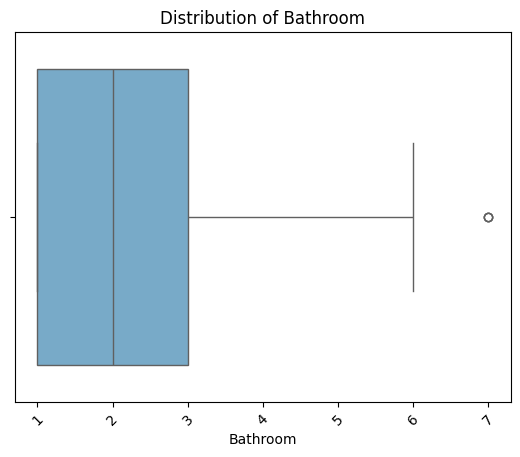

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2746563780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = dataset[col], palette='Blues')


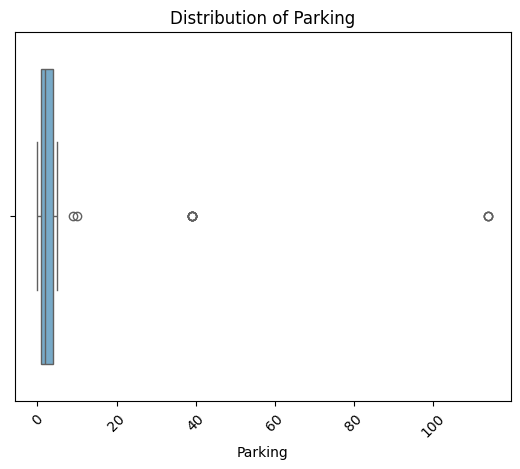

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2746563780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = dataset[col], palette='Blues')


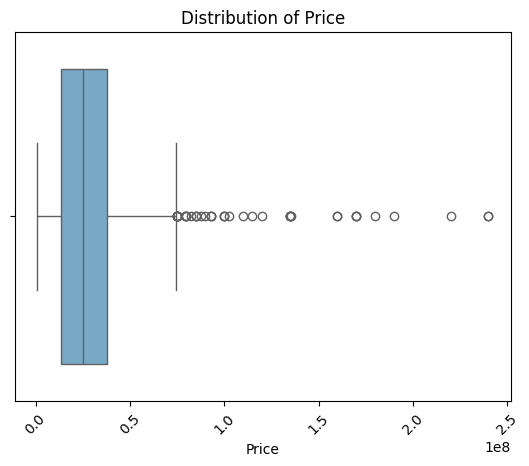

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2746563780.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = dataset[col], palette='Blues')


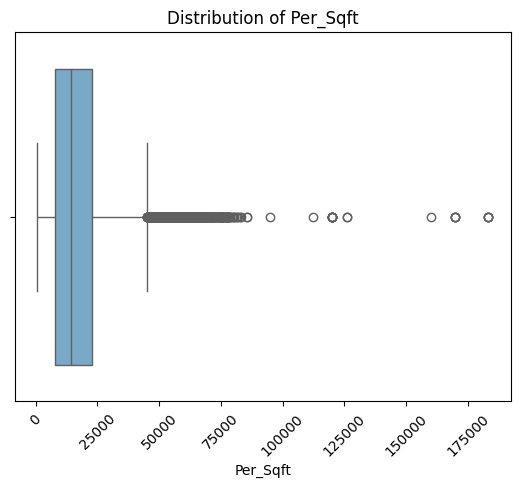

In [14]:
plt.figure(figsize=(5, 5))
for col in numericalCol.columns:
    sns.boxplot(x = dataset[col], palette='Blues')
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.xticks(rotation=45)
    plt.show()

## Preprocessing 


In [15]:
dataset.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       5
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             5
Per_Sqft       241
dtype: int64

In [16]:
dataset['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished', nan], dtype=object)

In [17]:
dataset['Furnishing'].fillna(dataset['Furnishing'].mode()[0], inplace = True)

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\2380371051.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Furnishing'].fillna(dataset['Furnishing'].mode()[0], inplace = True)


In [18]:
dataset['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [19]:
dataset['Type'].unique()

array(['Builder_Floor', 'Apartment', nan], dtype=object)

In [20]:
dataset['Type'].fillna(dataset['Type'].mode()[0], inplace = True)

C:\Users\ayanb\AppData\Local\Temp\ipykernel_17016\1976302505.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['Type'].fillna(dataset['Type'].mode()[0], inplace = True)


In [21]:
dataset['Type'].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [22]:
dataset.isnull().sum()

Area             0
BHK              0
Bathroom         2
Furnishing       0
Locality         0
Parking         33
Price            0
Status           0
Transaction      0
Type             0
Per_Sqft       241
dtype: int64

In [23]:
def numerical_missing_data(dataset):
    
    numerical_columns = dataset.select_dtypes(include=['int64', 'float64']).columns
    dataset[numerical_columns] = dataset[numerical_columns].fillna(dataset[numerical_columns].median())
    
    return dataset

numerical_missing_data(dataset)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,14368.0
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,865.0,4,4.0,Unfurnished,Dwarka,2.0,31833351,Ready_to_move,Resale,Builder_Floor,36801.0
19996,1030.0,2,2.0,Furnished,Dwarka,3.0,2900502,Almost_ready,New_Property,Apartment,2816.0
19997,879.0,1,1.0,Furnished,Rohini Sector 25,2.0,21080582,Almost_ready,Resale,Builder_Floor,23982.0
19998,2211.0,1,1.0,Furnished,Rohini Sector 24,3.0,15013389,Ready_to_move,New_Property,Builder_Floor,6790.0


In [24]:
dataset.isnull().sum()

Area           0
BHK            0
Bathroom       0
Furnishing     0
Locality       0
Parking        0
Price          0
Status         0
Transaction    0
Type           0
Per_Sqft       0
dtype: int64

# Encoding

In [25]:
categoricalCol

,Furnishing,Locality,Status,Transaction,Type
0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment
2,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment
3,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Rohini Sector 24,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...
19995,Unfurnished,Dwarka,Ready_to_move,Resale,Builder_Floor
19996,Furnished,Dwarka,Almost_ready,New_Property,Apartment
19997,Furnished,Rohini Sector 25,Almost_ready,Resale,Builder_Floor
19998,Furnished,Rohini Sector 24,Ready_to_move,New_Property,Builder_Floor


In [26]:
dataset['Furnishing'].unique()

array(['Semi-Furnished', 'Furnished', 'Unfurnished'], dtype=object)

In [27]:
dataset['Status'].unique()

array(['Ready_to_move', 'Almost_ready'], dtype=object)

In [28]:
dataset['Transaction'].unique()

array(['New_Property', 'Resale'], dtype=object)

In [29]:
dataset['Type'].unique()

array(['Builder_Floor', 'Apartment'], dtype=object)

In [30]:
dataset['Locality'].unique()

array(['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20', 'Rohini Sector 8 ',
       'Rohini Sector 16', 'Rohini Sector 14', 'Rohini Sector 9',
       'Vijay Vihar, Rohini', 'Rohini Sector 18',
       'Prashant Vihar, Rohini', 'Rohini Sector 5',
       'Sanskriti Apartment, Rohini Sector 28', 'Rohini Sector 19',
       'Lajpat Nagar 2', 'Lajpat Nagar 1', 'Lajpat Nagar',
       'Vikram Vihar, Lajpat Nagar', 'Lajpat Nagar 4', 'Lajpat Nagar 3',
       'Dayanand Colony', 'Amar Colony, Lajpat Nagar',
       'DDA Flats Sector 14, Dwarka Sector 14',
       'Siddhartha Heights, Dwarka Sector 24',
       'MTNL Employees House Welfare Society, Dwarka Sector 24',
       'Delhi Homes Yojana, Dwarka Sector 24',
       'The Elite Spire, Dwarka Sector 21',
       'Kunj Vihar Apartment, Dwarka Sector 12',
       'Ashirwa

In [31]:
fur = [['Unfurnished', 'Semi-Furnished', 'Furnished']]
stat = [['Ready_to_move', 'Almost_ready']]
trans = [['New_Property', 'Resale']]
Type = [['Builder_Floor', 'Apartment']]
Locality = [['Rohini Sector 25', 'J R Designers Floors, Rohini Sector 24',
       'Citizen Apartment, Rohini Sector 13', 'Rohini Sector 24',
       'Delhi Homes, Rohini Sector 24', 'Rohini Sector 21',
       'Rohini Sector 22', 'Rohini Sector 20', 'Rohini Sector 8 ',
       'Rohini Sector 16', 'Rohini Sector 14', 'Rohini Sector 9',
       'Vijay Vihar, Rohini', 'Rohini Sector 18',
       'Prashant Vihar, Rohini', 'Rohini Sector 5',
       'Sanskriti Apartment, Rohini Sector 28', 'Rohini Sector 19',
       'Lajpat Nagar 2', 'Lajpat Nagar 1', 'Lajpat Nagar',
       'Vikram Vihar, Lajpat Nagar', 'Lajpat Nagar 4', 'Lajpat Nagar 3',
       'Dayanand Colony', 'Amar Colony, Lajpat Nagar',
       'DDA Flats Sector 14, Dwarka Sector 14',
       'Siddhartha Heights, Dwarka Sector 24',
       'MTNL Employees House Welfare Society, Dwarka Sector 24',
       'Delhi Homes Yojana, Dwarka Sector 24',
       'The Elite Spire, Dwarka Sector 21',
       'Kunj Vihar Apartment, Dwarka Sector 12',
       'Ashirwad Apartments, Dwarka Sector 12',
       'Sunny Valley Apartments, Dwarka',
       'Shri Agrasen Apartment, Dwarka Sector 7',
       'Chopra Apartment, Dwarka Sector 23',
       'Mohinder Apartments, Dwarka Sector 12',
       'Chander Lok Apartment, Dwarka Sector 19',
       'Neelachal, Dwarka Sector 5', 'Dwarka',
       'MeeraBai Apartment, Dwarka Sector 5',
       'Crescent Apartments, Dwarka Sector 18',
       'Ashoka Enclave Apartment, Dwarka Sector 11',
       'Nav Kairali Apartment, Dwarka Sector 3',
       'Ashirwad Apartments, Dwarka',
       'Indraprastha Apartment, Dwarka Sector 12',
       'Mohinder Apartments, Dwarka',
       'Ashoka Apartments, Dwarka Sector 12',
       'Karuna Vihar Apartment, Dwarka', 'LNT Apartments, Dwarka',
       'Dwarka Sector 4', 'Dwarka Sector 3', 'Dwarka Sector 16B',
       'Vinoba Puri, Lajpat Nagar', 'Budh Vihar', 'Budh Vihar Phase 1',
       'Budh Vihar Phase 2', 'Saptrishi Apartment, Rohini Sector 23',
       'Rohini Sector 23', 'Rohini ( 1 km from Shahbad Dairy, Rohini)',
       'The Leela Sky Villas, Patel Nagar',
       'Uttam Nagar Floors, Uttam Nagar', 'Virat Residency, Dwarka Mor',
       'Find Homes, Greater Kailash 2', 'Adarsh Homes, Dwarka Mor',
       'Kushwaha Homes, Uttam Nagar', 'Godrej South Estate, Okhla',
       'APL Builder Floor, Greater Kailash 1', 'Janakpuri Block A3',
       'Greater Kailash 2', 'Partap Homes, Bhagwati Vihar, Uttam Nagar',
       'The Amaryllis, Karol Bagh',
       'Diamond Heights Multi Estate, Najafgarh',
       'Vasant Vihar Builder Floor, Vasant Vihar', 'Vasant Kunj',
       'Greater Kailash 1', 'Khanpur, Madangir', 'Batla House, Okhla',
       'Friends Colony West, New Friends Colony', 'New Friends Colony',
       'Maharani Bagh, New Friends Colony',
       'Friends Colony East, New Friends Colony',
       'Kalindi Colony, Maharani Bagh, New Friends Colony',
       'Taimoor Enclave, New Friends Colony',
       'New Friends Colony Floors, New Friends Colony',
       'Kailash Colony, Greater Kailash', 'Ram Nagar, Shahdara',
       'Jyoti Nagar West, Shahdara',
       'Hans Apartments, Vishwas Nagar, Shahdara',
       'Naveen Shahdara, Shahdara', 'Balbir Nagar, Shahdara',
       'Rohitash Nagar East, Shahdara', 'Shahdara',
       'Vishwas Nagar, Shahdara',
       'DDA RPS Flats, Mansarowar Park, Shahdara',
       'Yamuna Vihar, Shahdara', 'Rohtash Nagar, Shahdara',
       'Ram Nagar Extension, Shahdara', 'Maujpur, Shahdara',
       'Mansarowar Park, Shahdara', 'Gorakh Park West, Shahdara',
       'Shivnam Apartment, Shahdara', 'Jyoti Colony, Shahdara',
       'Ahinsha Vatika, Ram Nagar, Shahdara', 'Laxmi Nagar',
       'Guru Angad Nagar West, Laxmi Nagar', 'Lalita Park, Laxmi Nagar',
       'Krishan Kunj, Laxmi Nagar', 'Bank Enclave, Laxmi Nagar',
       'Uttam Nagar', 'Dwarka Mor', 'Uttam Nagar West',
       'SB Residency, Dwarka Mor', 'Kiran Garden, Uttam Nagar',
       'Mohan Garden, Razapur Khurd', 'Mitya Homes, Dwarka Mor',
       'New Uttam Nagar, Uttam Nagar', 'Patel Nagar South, Patel Nagar',
       'Patel Nagar West', 'Patel Nagar East, Patel Nagar',
       'Punjabi Basti, Patel Nagar', 'Baljit Nagar, Patel Nagar',
       'DDA Flats Vasant Kunj, Vasant Kunj Sector B',
       'DDA Flats Vasant Kunj, Vasant Kunj',
       'DDA Flats Pocket 1, Vasant Kunj Sector B',
       'Saraswati Narmada Ganga Yamuna Apartment, Vasant Kunj Sector D',
       'DDA Flats Sector E Pocket 1, Vasant Kunj',
       'DDA Flats Vasant Kunj, Vasant Kunj Sector D',
       'Vasant Kunj Sector A', 'E2 Vasant Kunj, Vasant Kunj',
       'Ganga Apartment Sector D Pocket 6, Vasant Kunj',
       'Vasant Kunj Sector C', 'Vasant Kunj Sector D',
       'DDA Flats Vasant Kunj, Vasant Kunj Sector C',
       'Kishangarh, Vasant Kunj', 'DDA Pocket 1, Vasant Kunj Sector D',
       'Vasant Kunj Sector B', 'Gandhi Nagar, Shahdara',
       'DDA Flats Mansarovar Park, Seelampur, Shahdara',
       'Seelampur, Shahdara', 'Shanti Mohalla, Shahdara',
       'Rajgarh Colony, Shahdara', 'Kanti Nagar East, Shahdara',
       'Raghubarpura, Shahdara', 'Sukhdev Vihar, Okhla', 'Geeta Colony',
       'Krishna Nagar Block A', 'Taj Enclave, Khairatabad',
       'Shastri Park, Shahdara', 'Sitaram Bazar, Chandni Chowk', 'Saket',
       'Anupam Enclave, Saket', 'RWA Flats, Saket',
       'Metrotech Builder Floors, Saket',
       'Saket Court Residential Complex, Saket',
       'Press Enclave Society, Saket',
       'Project Paryavaran Complex, Saket', 'Safdarjung Enclave',
       'Arjun Nagar, Safdarjung Enclave',
       'Krishna Nagar-Safdarjung Enclave',
       'Reserve Bank Enclave, Paschim Vihar', 'Paschim Vihar',
       'Pushkar Enclave, Paschim Vihar', 'Paschim Vihar Block B2',
       'Paschimpuri, Paschim Vihar', 'Paschim Vihar Block B4',
       'DDA Lig Flats, Paschim Vihar', 'Archana Apartment, Paschim Vihar',
       'Guru Harikishan Nagar, Paschim Vihar',
       'Mianwali Nagar, Paschim Vihar',
       'Navbharat Apartment, Paschim Vihar Block B1',
       'Paschim Vihar Block A2', 'LIC Colony, Paschim Vihar',
       'Shubh Niketan, Paschim Vihar',
       'Ashoka Apartment, Paschim Vihar Block A2',
       'Sunder Apartments, Sunder Vihar, Paschim Vihar',
       'Rajasthan Apartment, Aashirwaad Chowk, Dwarka',
       'Gold Croft Apartment, Aashirwaad Chowk, Dwarka',
       'Chanakya Apartments, Aashirwaad Chowk, Dwarka',
       'Bank Apartments, Aashirwaad Chowk, Dwarka',
       'Mohinder Apartments, Aashirwaad Chowk, Dwarka',
       'Aashirwaad Chowk, Dwarka',
       'Saheta Apartment, Aashirwaad Chowk, Dwarka',
       'Pushpanjali Apartments, Aashirwaad Chowk, Dwarka',
       'Green Heavens Apartment, Aashirwaad Chowk, Dwarka',
       'Hum Sub Apartment, Aashirwaad Chowk, Dwarka',
       'Defence Officers Apartment, Aashirwaad Chowk, Dwarka',
       'Sanchar Vihar Apartment, Aashirwaad Chowk, Dwarka',
       'Sarve Satyam Apartment, Aashirwaad Chowk, Dwarka',
       'Palm Green Apartment, Aashirwaad Chowk, Dwarka',
       'Neelachal, Aashirwaad Chowk, Dwarka',
       'Kailash Apartments, Aashirwaad Chowk, Dwarka',
       'New Jyoti Apartments, Aashirwaad Chowk, Dwarka',
       'PNB Employees Apartment, Aashirwaad Chowk, Dwarka',
       'Sadbhawna CGHS, Aashirwaad Chowk, Dwarka',
       'Commonwealth Games Village 2010',
       'Common Wealth Games Village, Commonwealth Games Village 2010',
       'Project Commonwealth Games Village 2010, Akshardham Temple',
       'Project Commonwealth Games Village 2010, Commonwealth Games Village 2010',
       'Alaknanda', 'Shivalik Apartments, Alaknanda',
       'Narmada Apartment, Alaknanda', 'Gangotri Enclave, Alaknanda',
       'Aravali Apartments, Alaknanda', 'Tara Apartment, Alaknanda',
       'Greater Kailash 4 Nri Colony',
       'Project Gangotri Enclave, Alaknanda',
       'Project Gangotri Enclave, Gangotri Enclave, Alaknanda',
       'Nilgiri Apartment, Alaknanda', 'Yamuna Apartment, Alaknanda',
       'Sarita Vihar, Mathura Road',
       'DDA Flats, Sarita Vihar, Mathura Road',
       'DDA Flats Sarita Vihar, Sarita Vihar, Mathura Road',
       'DDA Flats Sarita Vihar, Sarita Vihar Pocket K',
       'Sidharth Enclave, Kilokri, Ring Road', 'Sarita Vihar Pocket B',
       'Sarita Vihar Pocket F', 'New Manglapuri, Sultanpur',
       'Sultanpur Extension', 'Sultanpur', 'Manglapuri, Sultanpur',
       'Indra Park Palam, Manglapuri', 'Chhattarpur',
       'JVTS Gardens, Chhattarpur', 'Chhattarpur Enclave Phase2',
       'DLF Chattarpur Farms, Chhattarpur', 'Aravali Tower, Chhattarpur',
       'Mehrauli', 'Andheria Mor, Mehrauli', 'Brijwasi Colony, Mehrauli',
       'Mahavir Enclave', 'Mahavir Enclave Part 1',
       'Mahavir Enclave Part 3', 'Vijay Enclave, Mahavir Enclave',
       'Narela Sector A1', 'DDA Flats Pocket 6 Sector A10, Narela',
       'DDA Flats Pocket 1 Sector A9, Narela',
       'DDA Janta Flats, Tikri Khurd Sector B2, Narela', 'Narela',
       'DDA Lig Flats, Narela', 'DDA Flats Pocket 3, Narela',
       'DDA Pocket H, Narela', 'Narela Mandi', 'Bhorgarh, Narela',
       'Narela Sector A9', 'Narela Sector A5', 'Malviya Nagar',
       'Shivalik, Malviya Nagar', 'Geetanjali Enclave, Malviya Nagar',
       'Geetanjali Enclave Project, Geetanjali Enclave, Malviya Nagar',
       'Khirki extension, Malviya Nagar',
       'Dilshad Colony, Dilshad Garden',
       'Guru Teg Bahadur Enclave, Dilshad Garden', 'Dilshad Garden',
       'DDA Flats Block A, Dilshad Garden',
       'DDA Pocket JK, Dilshad Garden', 'DDA Pocket E, Dilshad Garden',
       'DDA Flats Pocket O, Dilshad Garden',
       'DDA Pocket I, Dilshad Garden', 'Vasundhara Enclave',
       'Samrat Apartment, Vasundhara Enclave',
       'Mangal Apartment, Vasundhara Enclave',
       'Prayag Apartments, Vasundhara Enclave',
       'Abhimanyu Apartments, Vasundhara Enclave',
       'Fancy Apartments, Vasundhara Enclave',
       'Shantidoot Apartment, Vasundhara Enclave',
       'Satyam Apartment, Vasundhara Enclave',
       'Anekant Apartment, Vasundhara Enclave',
       'New Delhi Apartment, Vasundhara Enclave',
       'Mahesh Apartment, Vasundhara Enclave',
       'Pawittra Apartment, Vasundhara Enclave',
       'Capital Apartment, Vasundhara Enclave',
       'Hindon Apartment, Vasundhara Enclave',
       'Gobind Apartment, Vasundhara Enclave',
       'Abul Fazal Enclave Part 1, Okhla',
       'Godrej South Estate, Okhla Phase 1',
       'Abul Fazal Enclave Part-II, Okhla', 'Jamia Nagar, Okhla',
       'Zakir Nagar, New Friends Colony',
       'Batla House Project, Batla House, Okhla', 'Dev Nagar, Karol Bagh',
       'Beadon Pura, Karol Bagh',
       'DDA Mig Flat, Prasad Nagar, Karol Bagh', 'Karol Bagh',
       'Prasad Nagar, Karol Bagh',
       'DDA MIG Flats Prasad Nagar Phase 2, Prasad Nagar, Karol Bagh',
       'DLF Capital Greens, Moti Nagar, Kirti Nagar',
       'DLF Capital Greens, New Moti Nagar, Kirti Nagar',
       'New Moti Nagar, Kirti Nagar', 'Sheikh Sarai Phase 1',
       'Sheikh Sarai', 'Sheikh Sarai Phase 2',
       'Savitri Nagar Village, Sheikh Sarai',
       'Panchsheel Vihar, Sheikh Sarai',
       'Apna Apartments, Savitri Nagar Village, Sheikh Sarai',
       'Punjabi Bagh Enclave, Punjabi Bagh West', 'Punjabi Bagh',
       'Punjabi Bagh West',
       'Punjabi Bagh Enclave, Shivaji Park, Punjabi Bagh',
       'Punjabi Bagh Extension, Punjabi Bagh',
       'DLF Capitals Phase III, Shivaji Park, Punjabi Bagh',
       'Punjabi Bagh Enclave, Punjabi Bagh',
       'Punjabi Bagh Enclave, Madipur, Punjabi Bagh',
       'Bhagwan Das Nagar, Punjabi Bagh', 'Punjabi Bagh East',
       'Pal Mohan Apartments, Punjabi Bagh',
       'Govindpuri Extension, Kalkaji', 'Kalkaji',
       'DDA LIG Flat, Kalkaji', 'Giri Nagar, KalkaJi',
       'Rishi Apartment, Kalkaji', 'Deshbandhu Apartments, Kalkaji',
       'Dda Janta Flats, Kalkaji', 'Kalkaji Extention',
       'Mandakini Enclave Project, Kalkaji', 'Hauz Khas',
       'Hauz Khas Apartment, Hauz Khas Enclave, Hauz Khas',
       'Sarva Priya Apartment, Hauz Khas', 'Hauz Khas Enclave, Hauz Khas',
       'Safdarjung Development Area, Hauz Khas',
       'Mayfair garden, Hauz Khas', 'Orchid Metropolis, Hauz Khas',
       'Chittaranjan Park', 'Arya Chittaranjan Park, Chittaranjan Park',
       'Nehru Enclave, Kalkaji', 'Chittaranjan Park Block A']]

In [32]:
from sklearn.preprocessing import OrdinalEncoder

fur_encode = OrdinalEncoder(categories=fur)
dataset['Furnishing'] = fur_encode.fit_transform(dataset[['Furnishing']])

stat_encode = OrdinalEncoder(categories=stat)
dataset['Status'] = stat_encode.fit_transform(dataset[['Status']])

trans_encode = OrdinalEncoder(categories=trans)
dataset['Transaction'] = trans_encode.fit_transform(dataset[['Transaction']])

Type_encode = OrdinalEncoder(categories=Type)
dataset['Type'] = Type_encode.fit_transform(dataset[['Type']])

Locality_encode = OrdinalEncoder(categories=Locality)
dataset['Locality'] = Locality_encode.fit_transform(dataset[['Locality']])

In [33]:
dataset.head(10)

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1.0,0.0,1.0,6500000,0.0,0.0,0.0,14368.0
1,750.0,2,2.0,1.0,1.0,1.0,5000000,0.0,0.0,1.0,6667.0
2,950.0,2,2.0,2.0,2.0,1.0,15500000,0.0,1.0,1.0,6667.0
3,600.0,2,2.0,1.0,3.0,1.0,4200000,0.0,1.0,0.0,6667.0
4,650.0,2,2.0,1.0,3.0,1.0,6200000,0.0,0.0,0.0,6667.0
5,1300.0,4,3.0,1.0,3.0,1.0,15500000,0.0,0.0,0.0,6667.0
6,1350.0,4,3.0,1.0,3.0,1.0,10000000,0.0,1.0,0.0,6667.0
7,650.0,2,2.0,1.0,4.0,1.0,4000000,0.0,0.0,1.0,6154.0
8,985.0,3,3.0,0.0,5.0,1.0,6800000,1.0,0.0,0.0,6154.0
9,1300.0,4,4.0,1.0,6.0,1.0,15000000,0.0,0.0,0.0,6154.0


# Removing outlier

In [34]:
dataset.shape

(20000, 11)

In [35]:
numericalCol

,Area,BHK,Bathroom,Parking,Price,Per_Sqft
0,800.0,3,2.0,1.0,6500000,NaN
1,750.0,2,2.0,1.0,5000000,6667.0
2,950.0,2,2.0,1.0,15500000,6667.0
3,600.0,2,2.0,1.0,4200000,6667.0
4,650.0,2,2.0,1.0,6200000,6667.0
...,...,...,...,...,...,...
19995,865.0,4,4.0,2.0,31833351,36801.0
19996,1030.0,2,2.0,3.0,2900502,2816.0
19997,879.0,1,1.0,2.0,21080582,23982.0
19998,2211.0,1,1.0,3.0,15013389,6790.0


In [36]:
categoricalCol

,Furnishing,Locality,Status,Transaction,Type
0,Semi-Furnished,Rohini Sector 25,Ready_to_move,New_Property,Builder_Floor
1,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",Ready_to_move,New_Property,Apartment
2,Furnished,"Citizen Apartment, Rohini Sector 13",Ready_to_move,Resale,Apartment
3,Semi-Furnished,Rohini Sector 24,Ready_to_move,Resale,Builder_Floor
4,Semi-Furnished,Rohini Sector 24,Ready_to_move,New_Property,Builder_Floor
...,...,...,...,...,...
19995,Unfurnished,Dwarka,Ready_to_move,Resale,Builder_Floor
19996,Furnished,Dwarka,Almost_ready,New_Property,Apartment
19997,Furnished,Rohini Sector 25,Almost_ready,Resale,Builder_Floor
19998,Furnished,Rohini Sector 24,Ready_to_move,New_Property,Builder_Floor


In [37]:
def remove_outliers(dataset, numericalCol, categoricalCol):
    for col in numericalCol + categoricalCol:
        Q1 = dataset[col].quantile(0.25)
        Q3 = dataset[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        dataset = dataset[(dataset[col] >= lower_bound) & (dataset[col] <= upper_bound)]
    return dataset

In [38]:
dataset = remove_outliers(dataset, numericalCol, categoricalCol)
dataset

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1.0,0.0,1.0,6500000,0.0,0.0,0.0,14368.0
1,750.0,2,2.0,1.0,1.0,1.0,5000000,0.0,0.0,1.0,6667.0
2,950.0,2,2.0,2.0,2.0,1.0,15500000,0.0,1.0,1.0,6667.0
3,600.0,2,2.0,1.0,3.0,1.0,4200000,0.0,1.0,0.0,6667.0
4,650.0,2,2.0,1.0,3.0,1.0,6200000,0.0,0.0,0.0,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
19995,865.0,4,4.0,0.0,39.0,2.0,31833351,0.0,1.0,0.0,36801.0
19996,1030.0,2,2.0,2.0,39.0,3.0,2900502,1.0,0.0,1.0,2816.0
19997,879.0,1,1.0,2.0,0.0,2.0,21080582,1.0,1.0,0.0,23982.0
19998,2211.0,1,1.0,2.0,3.0,3.0,15013389,0.0,0.0,0.0,6790.0


In [39]:
dataset.shape

(18180, 11)

In [40]:
from sklearn.model_selection import train_test_split, cross_val_score

X = dataset.drop(['Price'], axis=1)
y = dataset['Price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [41]:
print(X_train.shape)
print(X_test.shape)

(14544, 10)
(3636, 10)


In [42]:
X

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,1.0,0.0,1.0,0.0,0.0,0.0,14368.0
1,750.0,2,2.0,1.0,1.0,1.0,0.0,0.0,1.0,6667.0
2,950.0,2,2.0,2.0,2.0,1.0,0.0,1.0,1.0,6667.0
3,600.0,2,2.0,1.0,3.0,1.0,0.0,1.0,0.0,6667.0
4,650.0,2,2.0,1.0,3.0,1.0,0.0,0.0,0.0,6667.0
...,...,...,...,...,...,...,...,...,...,...
19995,865.0,4,4.0,0.0,39.0,2.0,0.0,1.0,0.0,36801.0
19996,1030.0,2,2.0,2.0,39.0,3.0,1.0,0.0,1.0,2816.0
19997,879.0,1,1.0,2.0,0.0,2.0,1.0,1.0,0.0,23982.0
19998,2211.0,1,1.0,2.0,3.0,3.0,0.0,0.0,0.0,6790.0


In [43]:
y

0         6500000
1         5000000
2        15500000
3         4200000
4         6200000
           ...   
19995    31833351
19996     2900502
19997    21080582
19998    15013389
19999    24640842
Name: Price, Length: 18180, dtype: int64

## Model Building

In [44]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
import xgboost as xgb
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR

from sklearn.metrics import r2_score

In [45]:
RFR = RandomForestRegressor(n_estimators=40,random_state=0)

RFR.fit(X_train, y_train)
y_pred1 = RFR.predict(X_test)
r2 = r2_score(y_test, y_pred1)
print(f"{RFR.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")

RandomForestRegressor :-- R-squared (R2): 99.72


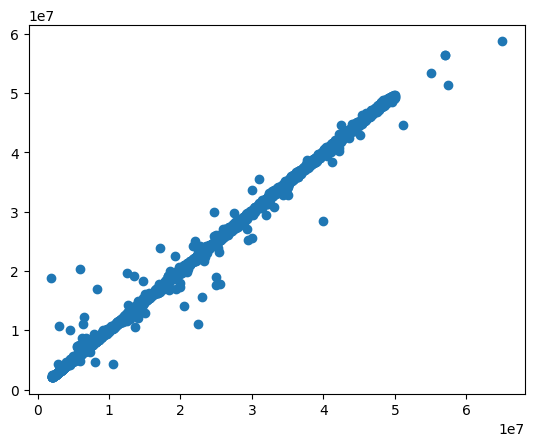

In [46]:
plt.scatter(x=y_test, y=y_pred1)
plt.show()

In [47]:
LR = LinearRegression()

LR.fit(X_train, y_train)
y_pred2 = LR.predict(X_test)
r2 = r2_score(y_test, y_pred2)
print(f"{LR.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")

LinearRegression :-- R-squared (R2): 81.41


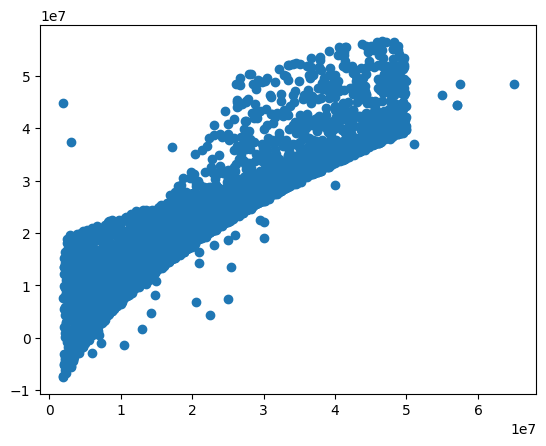

In [48]:
plt.scatter(x=y_test, y=y_pred2)
plt.show()

In [49]:
GBR = GradientBoostingRegressor()

GBR.fit(X_train, y_train)
y_pred3 = GBR.predict(X_test)
r2 = r2_score(y_test, y_pred3)
print(f"{GBR.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")

GradientBoostingRegressor :-- R-squared (R2): 99.01


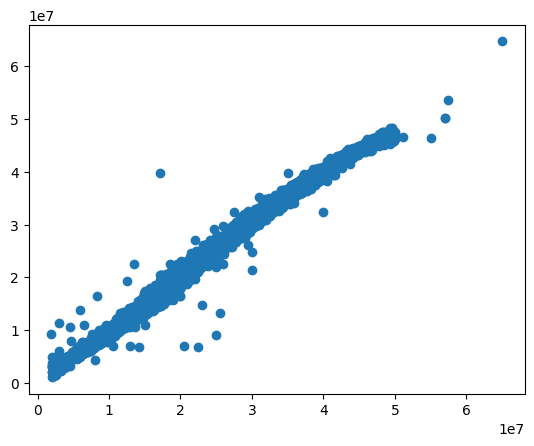

In [50]:
plt.scatter(x=y_test, y=y_pred3)
plt.show()

In [51]:
SVR = SVR(kernel='linear', C = 1, gamma = 'auto', epsilon = 0)
SVR.fit(X_train, y_train)
y_pred4 = SVR.predict(X_test)
r2 = r2_score(y_test, y_pred4)
print(f"{SVR.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")

SVR :-- R-squared (R2): 79.70


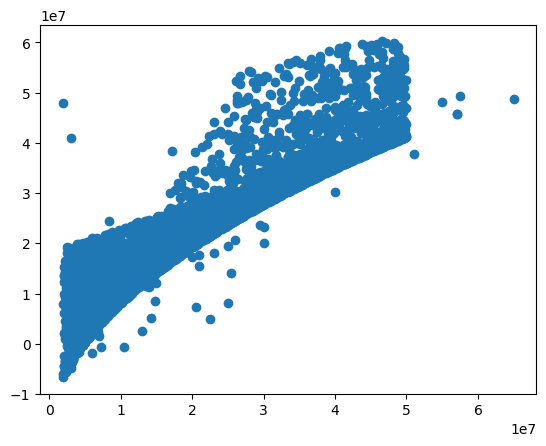

In [52]:
plt.scatter(x=y_test, y=y_pred4)
plt.show()

In [53]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.svm import SVR
# from sklearn.metrics import r2_score

# # Define parameter grid for hyperparameter tuning
# param_grid = {
#     'kernel': ['linear', 'rbf', 'poly'],
#     'C': [0.1, 1, 10, 100],
#     'gamma': ['scale', 'auto'],
#     'epsilon': [0.1, 0.2, 0.5, 0.01]
# }

# # Initialize SVR model
# svr = SVR()

# # GridSearchCV for hyperparameter tuning
# grid_search = GridSearchCV(svr, param_grid, cv=5, scoring='r2', verbose=2, n_jobs=-1)
# grid_search.fit(X_train, y_train)

# # Get the best model with tuned hyperparameters
# best_svr = grid_search.best_estimator_

# # Predict using the best model
# y_pred4 = best_svr.predict(X_test)

# # Calculate R-squared (R2) score
# r2 = r2_score(y_test, y_pred4)
# print(f"Best SVR Model: {best_svr}")
# print(f"R-squared (R2): {r2 * 100:.2f}")

# # Optionally, view the best hyperparameters
# print("Best Hyperparameters:", grid_search.best_params_)

In [54]:
DTR = DecisionTreeRegressor()

DTR.fit(X_train, y_train)
y_pred5 = DTR.predict(X_test)
r2 = r2_score(y_test, y_pred5)
print(f"{DTR.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")

DecisionTreeRegressor :-- R-squared (R2): 99.54


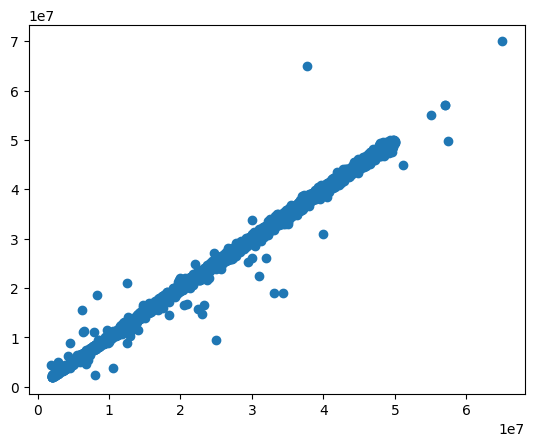

In [55]:
plt.scatter(x=y_test, y=y_pred5)
plt.show()

In [56]:
from sklearn.neighbors import KNeighborsRegressor

KNR = KNeighborsRegressor()

KNR.fit(X_train, y_train)
y_pred6 = KNR.predict(X_test)
r2 = r2_score(y_test, y_pred6)
print(f"{KNR.__class__.__name__} :-- R-squared (R2): {r2*100:.2f}")

KNeighborsRegressor :-- R-squared (R2): 98.91


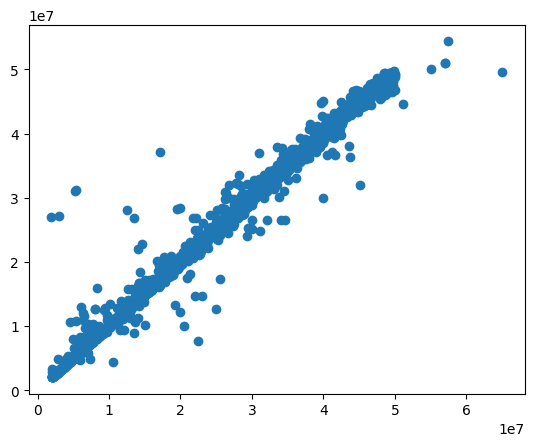

In [57]:
plt.scatter(x=y_test, y=y_pred6)
plt.show()

## Predicting 

In [58]:
# 750.0 	2 	 2.0	1.0 	1.0 	 0.0	0.0 	1.0 	6667.0
# 750.0 	2 	 2.0 	1.0 	1.0 	1.0 	0.0 	0.0 	1.0 	6667.0

In [61]:
Area = float(input(f"Enter value for Area [in sq feet]:-> "))
BHK = float(input(f"Enter value for BHK :-> "))
Bathroom = float(input(f"Enter value for Bathroom :-> "))
Furnishing = float(input(f"Enter value for Furnishing [0 : Unfurnished, 1 : Semi-Furnished, 2 : Furnished] :-> "))
Locality = float(input(f"Enter Locality :-> "))
Parking = float(input(f"Enter value for Parking :-> "))
Status = float(input(f"Enter value for Status [0 : Ready_to_move, 1 : Almost_ready]:-> "))
Transaction = float(input(f"Enter value for Transaction [0 : New_Property, 1 : Resale]:-> "))
Type = float(input(f"Enter value for Type [0 : Builder_Floor, 1 : Apartment]:-> "))
Per_Sqft = float(input(f"Enter value for Per_Sqft :-> "))

X_data = [Area, BHK, Bathroom, Furnishing, Locality, Parking, Status, Transaction, Type, Per_Sqft]

# Convert user input to numpy array and reshape
user_input_array = np.asarray(X_data).reshape(1, -1)

predicted_price = RFR.predict(user_input_array)[0]

print('\n')

print(f"Predicted price is: {predicted_price:.2f}")



Predicted price is: 4978047.95


c:\Users\ayanb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [63]:
import pickle
pickle.dump(RFR,open('reqmodel.pkl','wb'))
pickled_model = pickle.load(open('reqmodel.pkl','rb'))
pickled_model.predict(user_input_array)

c:\Users\ayanb\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


array([4978047.95])

# 